# COM Distance Analysis of LAT1 at CHOL3 Binding Site

In this notebook, we calculate how the center of mass (COM) distance between key regions of the LAT1 protein, is affecting by cholesterol binding at the CHOL3. In general, this analysis helps quantify the movement between protein domains over the course of an MD simulation.

In this notebook, I specifically focus on the distance between transmembrane helices TM6b and TM8, which are crucial structural functional elements of the LAT1 protein. I analyze this distance over time for four independent replicate simulations.

As with the other analyses, this notebook analyzes PCA across four independent replicates of LAT1-cholesterol complex, with cholesterol bound to the CHOL3 binding site. For access to the MD files used in this notebook, please refer to Zenodo (linked in the README file).

In [1]:
import MDAnalysis as mda
from MDAnalysis.analysis import distances

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

**1. Load the Trajectories for CHOL3**

Load the MD trajectory and topology files for each of the four replicate systems of LAT1 bound to cholesterol at the CHOL3 site. Each replicate allows us to assess the consistency of protein motion across different runs.load the MD trajectory and topology files for each of the four replicate systems of LAT1 bound to cholesterol at the CHOL3 site. Each replicate allows us to assess the consistency of protein motion across different runs.

In [2]:
# Load the trajectory and topology files for four replicate systems of CHOL3
u31 = mda.Universe('../Files/CHOL3/clr3_md1.pdb', '../Files/CHOL3/clr3_md1.xtc')
u32 = mda.Universe('../Files/CHOL3/clr3_md2.pdb', '../Files/CHOL3/clr3_md2.xtc')
u33 = mda.Universe('../Files/CHOL3/clr3_md3.pdb', '../Files/CHOL3/clr3_md3.xtc')
u34 = mda.Universe('../Files/CHOL3/clr3_md4.pdb', '../Files/CHOL3/clr3_md4.xtc')

# Group the universes in a list for easy processing
chol3_replicates = [u31, u32, u33, u34]

**2. Define Transmembrane Regions (TMs)**

In this analysis, we focus on the distance between transmembrane helices TM6b and TM8. These helices play a key role in the structural integrity and function of the LAT1 protein.

In [3]:
# Define the selections for TM6b and TM8
TM6b_selection = 'resid 261:267'
TM8_selection = 'resid 346:356'

**3. Calculate COM Distance**

COM distance allows us to quantify the movement between these regions during the simulation. 

Let's use the function below calculates the COM distance between the two selected domains (TM6b and TM8) over time for a given MD trajectory. 

In [4]:
def calculate_com_distance(universe, domain1_selection, domain2_selection):
    domain1 = universe.select_atoms(domain1_selection)
    domain2 = universe.select_atoms(domain2_selection)
    
    time_ns = []  # Time in nanoseconds
    com_distances = []  # COM distances for each frame
    
    for ts in universe.trajectory:
        com1 = domain1.center_of_mass()
        com2 = domain2.center_of_mass()
        
        distance = np.linalg.norm(com1 - com2)  # Calculate the Euclidean distance between COMs
        com_distances.append(distance)
        
        time_ns.append(ts.time / 1000.0)  # Convert from ps to ns
    
    return time_ns, com_distances

Visualizing COM

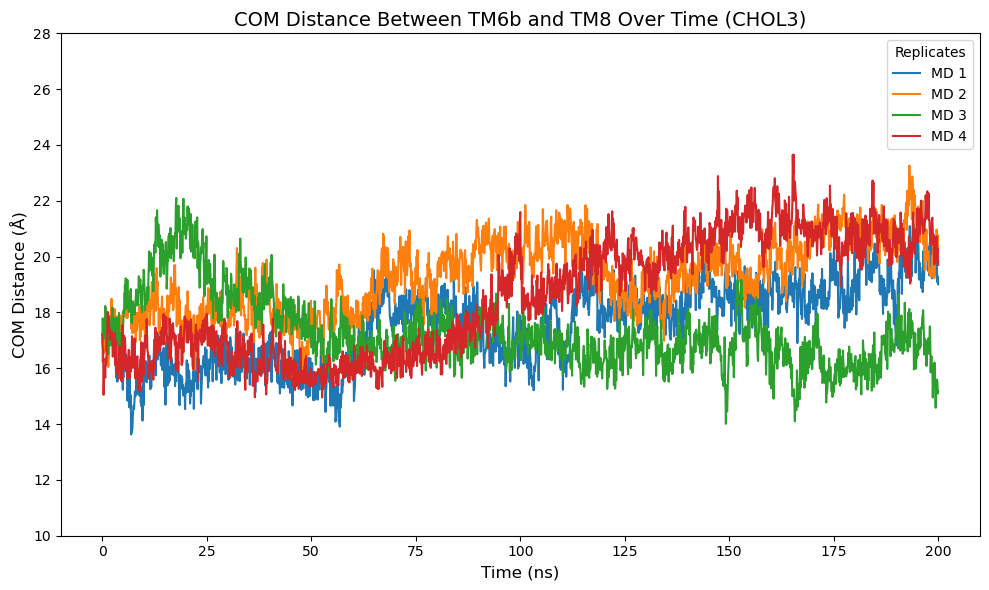

In [5]:
fig, ax = plt.subplots(figsize=(10, 6))

for i, universe in enumerate(chol3_replicates):
    time_ns, com_distances = calculate_com_distance(universe, TM6b_selection, TM8_selection)
    ax.plot(time_ns, com_distances, label=f'MD {i+1}')

# Customize the plot
ax.set_title('COM Distance Between TM6b and TM8 Over Time (CHOL3)', fontsize=14)
ax.set_xlabel('Time (ns)', fontsize=12)
ax.set_ylabel('COM Distance (Å)', fontsize=12)
ax.set_ylim(10, 28)
ax.legend(title='Replicates', fontsize=10)

plt.tight_layout()
plt.show()

This plot shows the evolution of the COM distance over time and helps us visualize how the two helices move relative to each other during the simulation.

While this plot is very useful, it may be difficult to fully see what the distibution or range of dustances covered during the MD runs. TO do so, we can use a histogram plot that better visualizes the distribution of COM distances between TM6b and TM8 over the course of the simulation for each of the four replicates. 

In totality, both plots provides insights into how frequently certain distances occur, indicating how the two helices behave in relation to each other.

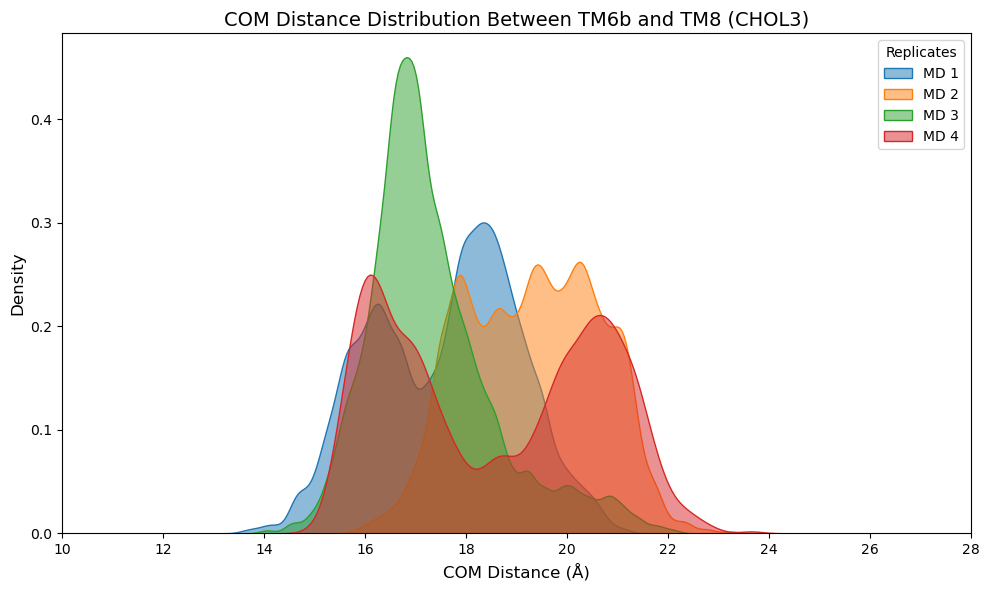

In [6]:
# Histogram for COM distance distribution
fig, ax = plt.subplots(figsize=(10, 6))

for i, universe in enumerate(chol3_replicates):
    _, com_distances = calculate_com_distance(universe, TM6b_selection, TM8_selection)
    sns.kdeplot(com_distances, bw_adjust=0.5, label=f'MD {i+1}', fill=True, alpha=0.5, ax=ax)

# Customize the plot
ax.set_title('COM Distance Distribution Between TM6b and TM8 (CHOL3)', fontsize=14)
ax.set_xlabel('COM Distance (Å)', fontsize=12)
ax.set_ylabel('Density', fontsize=12)
ax.set_xlim(10, 28)
ax.legend(title='Replicates', fontsize=10)

plt.tight_layout()
plt.show()

The analysis of COM distances between TM6b and TM8 in LAT1 at the CHOL3 binding site reveals key insights into the protein's structural dynamics. The temporal evolution plot shows how the distance between these helices changes over the course of the simulation, while the distribution plot provides information on how frequently certain distances are observed.

Both visualizations indicate the flexibility and interaction between these transmembrane helices in the presence of cholesterol, with slight variations between the different replicates.

Refer to the publication for detailed interpretation of these plots.